In [327]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.display import Image, display, HTML


In [328]:
caminho_imagem = 'gas_seco.png'
caminho_imagem2 = "https://blog.professorferretto.com.br/wp-content/uploads/2018/08/T1-funcao-do-primeiro-grau.png"
texto_formatado = "<h1>Reservatório Volumétrico de Gás Seco</h1>"


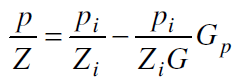

In [329]:
display(HTML(texto_formatado))
display(Image(filename=caminho_imagem))
display(Image(url=caminho_imagem2))

In [330]:
# Importar do Excel

In [210]:
df = pd.read_excel('dados_semestral_gas.xlsx')

In [211]:
df

,Gp (MMM SCF),Pressure (psia),Psecrit Pressure (psia),Psecrit Tempeture(R),Pseud Pressure(psia),Psred Tempeture(R),Z Factor
0,0,2538,665,420,3.816541,1.449214,0.741
1,10,2381,665,420,3.580451,1.449214,0.740
2,20,2223,665,420,3.342857,1.449214,0.739
3,30,2085,665,420,3.135338,1.449214,0.742
4,40,1940,665,420,2.917293,1.449214,0.751
5,50,1801,665,420,2.708271,1.449214,0.755


In [331]:
#Não temos a variáveil tempo, devemos colocá-lá: SEMESTRALMENTE

In [212]:
#Tempo = [0,0.5,1.0,1.5,2.0,2.5]
Tempo = np.arange(0,2.6,0.5)
df.insert(0, 'Tempo (Anos)', Tempo)

In [213]:
df

,Tempo (Anos),Gp (MMM SCF),Pressure (psia),Psecrit Pressure (psia),Psecrit Tempeture(R),Pseud Pressure(psia),Psred Tempeture(R),Z Factor
0,0.0,0,2538,665,420,3.816541,1.449214,0.741
1,0.5,10,2381,665,420,3.580451,1.449214,0.740
2,1.0,20,2223,665,420,3.342857,1.449214,0.739
3,1.5,30,2085,665,420,3.135338,1.449214,0.742
4,2.0,40,1940,665,420,2.917293,1.449214,0.751
5,2.5,50,1801,665,420,2.708271,1.449214,0.755


In [332]:
#SELECIONAR APENAS AS COLUNAS DE INTERESSE: MODO 1- DIGITANDO O NOME DAS COLUNAS

In [214]:
colunas_sel = ['Tempo (Anos)','Gp (MMM SCF)','Pressure (psia)','Z Factor']
df_dois = df[colunas_sel]

In [215]:
df_dois

,Tempo (Anos),Gp (MMM SCF),Pressure (psia),Z Factor
0,0.0,0,2538,0.741
1,0.5,10,2381,0.740
2,1.0,20,2223,0.739
3,1.5,30,2085,0.742
4,2.0,40,1940,0.751
5,2.5,50,1801,0.755


In [ ]:
#SELECIONAR APENAS AS COLUNAS DE INTERESSE: MODO 2 - ATRAVÉS DOS ÍNDICES DAS COLUNAS

In [216]:
colunas=list(df.columns)

for indice, valor in enumerate(colunas):
    print(indice,valor)


0 Tempo (Anos)
1 Gp (MMM SCF)
2 Pressure (psia)
3 Psecrit Pressure (psia)
4 Psecrit Tempeture(R)
5 Pseud Pressure(psia)
6  Psred Tempeture(R)
7 Z Factor


In [217]:
indices_colunas_selecionadas = [0, 1,2,7]
df_novo = df.iloc[:, indices_colunas_selecionadas]

In [218]:
df_novo

,Tempo (Anos),Gp (MMM SCF),Pressure (psia),Z Factor
0,0.0,0,2538,0.741
1,0.5,10,2381,0.740
2,1.0,20,2223,0.739
3,1.5,30,2085,0.742
4,2.0,40,1940,0.751
5,2.5,50,1801,0.755


In [219]:
#df_novo.rename(columns={'Z Factor':'Fator Z'},inplace=True)

In [ ]:
#CÁLCULO DO P/Z

In [220]:
df_novo['P/Z']= df_novo['Pressure (psia)']/df_novo['Z Factor']
df_novo

C:\Users\jvsil\AppData\Local\Temp\ipykernel_13924\1940617649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['P/Z']= df_novo['Pressure (psia)']/df_novo['Z Factor']


,Tempo (Anos),Gp (MMM SCF),Pressure (psia),Z Factor,P/Z
0,0.0,0,2538,0.741,3425.101215
1,0.5,10,2381,0.740,3217.567568
2,1.0,20,2223,0.739,3008.119080
3,1.5,30,2085,0.742,2809.973046
4,2.0,40,1940,0.751,2583.222370
5,2.5,50,1801,0.755,2385.430464


In [ ]:
#PLOTAR GRÁFICO DOS DADOS

In [221]:
x = df_novo["Gp (MMM SCF)"]
y = df_novo['P/Z']

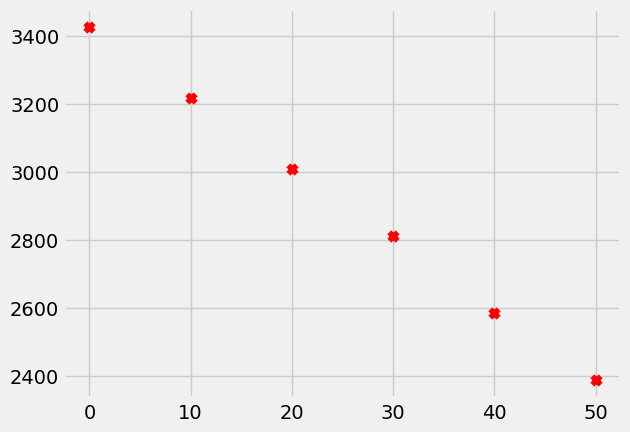

In [222]:
plt.scatter(x,y,marker = 'x',color = 'red')


In [ ]:
#MODO 1 DE ENCONTRAR OS COEFICIENTES DA FUNÇÃO:

In [223]:
model = np.polyfit(x, y, 1)
model

array([ -20.85581537, 3426.29767463])

In [224]:
#out: model(coeficiente_angular,coeficiente_linear)

In [ ]:
#GERAR UMA TABELA DE DADOS PARA GERAÇÃO DO GRÁFICO

In [225]:
PZ = np.arange(model[1],-0.1,-1)
GPP = (PZ-model[1])/model[0]

In [226]:
DF = pd.DataFrame({"Gp (MMM SCF)": GPP, "P/Z": PZ})
DF

,Gp (MMM SCF),P/Z
0,-0.000000,3426.297675
1,0.047948,3425.297675
2,0.095897,3424.297675
3,0.143845,3423.297675
4,0.191793,3422.297675
...,...,...
3422,164.078936,4.297675
3423,164.126884,3.297675
3424,164.174833,2.297675
3425,164.222781,1.297675


In [227]:
XX = [df_novo['Gp (MMM SCF)']]
YY = [df_novo['P/Z']]


In [ ]:
#PARA P/Z = 0, TEM-SE O VOLUME DE GAS INPLACE

In [228]:
gas_inicial_inplace =  -model[1]/model[0]
gas_inicial_inplace

164.28500219480924

In [ ]:
#PRECISAMOS SABER ATÉ QUAL ÍNDICE, ESTÃO OS DADOS EXPERIMENTAIS

In [229]:
DF.loc[DF['Gp (MMM SCF)']<=50]

,Gp (MMM SCF),P/Z
0,-0.000000,3426.297675
1,0.047948,3425.297675
2,0.095897,3424.297675
3,0.143845,3423.297675
4,0.191793,3422.297675
...,...,...
1038,49.770291,2388.297675
1039,49.818239,2387.297675
1040,49.866188,2386.297675
1041,49.914136,2385.297675


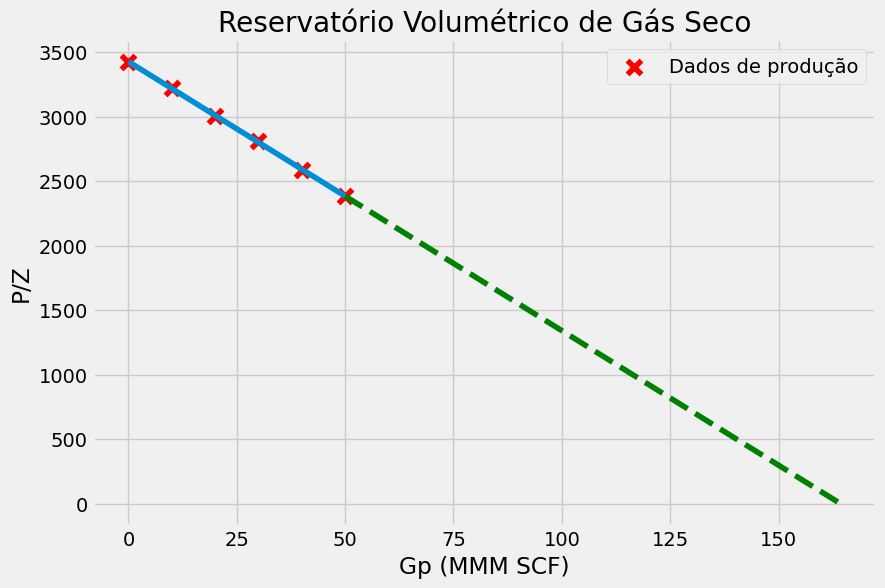

O volume de gás inicial é: 164.28500219480924 MMMSCF


In [230]:
plt.figure(figsize = (9,6))
plt.plot(DF["Gp (MMM SCF)"][1:1050],DF["P/Z"][1:1050])
plt.plot(DF["Gp (MMM SCF)"][1042:3426],DF["P/Z"][1042:3426], ls = "--",color='green')
plt.scatter(XX,YY,s=100,marker = 'x',color = 'red',label = "Dados de produção")
plt.xlabel("Gp (MMM SCF)")
plt.ylabel("P/Z")
plt.title("Reservatório Volumétrico de Gás Seco")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("O volume de gás inicial é:", gas_inicial_inplace,"MMMSCF")

# Regressão Linear - Aprendizagem Supervisionada

In [231]:
from sklearn.linear_model import LinearRegression

In [310]:
Y=df_novo['Gp (MMM SCF)'].values
X=df_novo['P/Z'].values

In [311]:
X=X.reshape(-1,1)

In [312]:
Y=Y.reshape(-1,1)

In [313]:
X.shape

(6, 1)

In [314]:
modelo = LinearRegression()

In [315]:
modelo.fit(X,Y)

LinearRegression()

In [316]:
modelo.intercept_

array([164.25355404])

In [317]:
modelo.coef_

array([[-0.04793743]])

In [318]:
print("O volume de gás inicial in place é:", modelo.predict([[0]]))

O volume de gás inicial in place é: [[164.25355404]]
